<a href="https://colab.research.google.com/github/simodepth96/analytics-/blob/main/EDA_Basics_Central_Tendency_%26_Spread_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

Exploratory Data Analysis (EDA) is all about getting curious about your data – finding out what is there, what patterns you can find, and what relationships exist.

EDA is useful for
- inform data cleaning
- illuminate new research questions
-  choose appropriate analysis techniques

EDA is commonly performed at the start of a project but can be revised continuously. It is therefore useful to think of EDA as a cyclical process rather than linear in a data science workflow

#The EDA process

The EDA process usually falls into the following subparts of data analysis:
- **Univariate Analysis** (the inspection of one single Variable)
- **Bivariate Analysis** (the inspection of the relationship between 2 variables)
- **Multivariate Analysis** (the inspection of the relationship between > 2 varibales)

EDA is useful in the following scenarios:

- **Data inspection** - (.head)includes detecting missing values (NaN) and outliers **without digging deeper**.
- **Numerical summarization** - (.describe) includes exploring distribution and central tendency measures 
- **Data visualization** - includes plotting histogram to glare a distribution or a scatterplot to investigate correlation

In [ ]:
!pip install plotly
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Exploratory Data Analysis (EDA) with Pandas 


---

In this tutorial we are going to use a Serie A football chart from the current season to manipulate information and and perform an overall EDA with Pandas 



##Legend

- Rk -- Rank
- MP -- Matches Played by the player or squad
- W -- Wins
- D -- Draws
- L -- Losses
- GF -- Goals For
- GA -- Goals Against
- GD -- Goal Difference
- Pts -- points
- Pts/MP -- Points per Match Played
- xG -- Expected Goals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
- xGA -- Expected Goals Allowed
- xGD -- Expected Goals Difference
- xGD/90 -- Expected Goals Difference per 90 Minutes
- Last 5 -- Last Five Matches
- Attendance -- Attendance per game during this season, only for home matches
- Top Team Scorer -- Only includes league matches for that season
- Goalkeeper -- Goalkeeper with the most minutes in league play



In [ ]:
import pandas as pd

# Retrieve HTML table data
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
html = pd.read_html(url, header = 0)
df2022 = html[0]

#Visualize the Columns of the Dataset
print(df2022.columns)
df2022



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,77.7,31.3,46.4,1.22,53249,Erling Haaland - 36,Ederson,→ Champions League via league finish
1,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.4,42.0,29.5,0.78,60191,"Martin Ødegaard, Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
2,3,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67.7,50.4,17.3,0.45,73671,Marcus Rashford - 17,David de Gea,→ Champions League via league finish
3,4,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,71.9,39.6,32.4,0.85,52127,Callum Wilson - 18,Nick Pope,→ Champions League via league finish
4,5,Liverpool,38,19,10,9,75,47,28,67,1.76,72.4,50.8,21.6,0.57,53163,Mohamed Salah - 19,Alisson,→ Europa League via league finish
5,6,Brighton,38,18,8,12,72,53,19,62,1.63,73.4,50.3,23.2,0.61,31477,Alexis Mac Allister - 10,Robert Sánchez,→ Europa League via league finish
6,7,Aston Villa,38,18,7,13,51,46,5,61,1.61,50.3,52.6,-2.3,-0.06,39485,Ollie Watkins - 15,Emiliano Martínez,→ Europa Conference League via league finish
7,8,Tottenham,38,18,6,14,70,63,7,60,1.58,57.1,49.7,7.4,0.19,61585,Harry Kane - 30,Hugo Lloris,NaN
8,9,Brentford,38,15,14,9,58,46,12,59,1.55,55.9,48.9,7.0,0.18,17078,Ivan Toney - 20,David Raya,NaN
9,10,Fulham,38,15,7,16,55,53,2,52,1.37,46.2,63.8,-17.6,-0.46,23746,Aleksandar Mitrović - 14,Bernd Leno,NaN


In [ ]:
#@title Count rows for each column
df2022.count()


Full URL                         420
Non-Indexable Main Reason        420
Non-Indexable Detailed Reason    420
Sitemaps                         420
HTTP Status Code                 420
Canonical Points to Self         214
Canonical To                     214
Protocol                         420
Is Indexable                     420
Has Nofollow Meta Tag            420
Has noindex Meta Tag             420
URL is Part of Redirect Loop     206
Counter                          420
dtype: int64

In [ ]:
# perform some basic summary statistics on the dataset
df2022.describe()

#Lowercase all column names for consistency



In [ ]:
import pandas as pd

# map() applies the str.lower() function to each of the columns in our dataset to convert the column names to all lowercase
df2022.columns = map(str.lower, df2022.columns)
df2022.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,xg,xga,xgd,xgd/90,attendance,top team scorer,goalkeeper,notes
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,77.7,31.3,46.4,1.22,53249,Erling Haaland - 36,Ederson,→ Champions League via league finish
1,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.4,42.0,29.5,0.78,60191,"Martin Ødegaard, Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
2,3,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67.7,50.4,17.3,0.45,73671,Marcus Rashford - 17,David de Gea,→ Champions League via league finish
3,4,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,71.9,39.6,32.4,0.85,52127,Callum Wilson - 18,Nick Pope,→ Champions League via league finish
4,5,Liverpool,38,19,10,9,75,47,28,67,1.76,72.4,50.8,21.6,0.57,53163,Mohamed Salah - 19,Alisson,→ Europa League via league finish


In [ ]:
#@title Look at the Types od Data
df2022.dtypes

rk                   int64
squad               object
mp                   int64
w                    int64
d                    int64
l                    int64
gf                   int64
ga                   int64
gd                   int64
pts                  int64
pts/mp             float64
xg                 float64
xga                float64
xgd                float64
xgd/90             float64
attendance           int64
top team scorer     object
goalkeeper          object
notes               object
dtype: object

#Mising Data
---

- **Missing Completely at Random (MCAR)**= no logical reason why data is missing. Pure chance.

E.g. technical problems, glitches from reporting on:
GSC search performance
Ahrefs 
Screaming frog crawls


- **Missing at Random** = systematic relationship between missing values and the observed data.
**P(A|B) = P(A)**
So here missing values exist due to another variable in your dataset.

E.g. If no-indexed pages (Indexability column) are more likely to have an empty meta description, it would fall under MAR. 


- **Missing Not at Random (MNAR)**: missing data due to a human error.

E.g. pages with more traffic are less likely to have meta descriptions. This implies you didn't connect any API with traffic data.


In [ ]:
#@title Look for missing data
# counts the number of missing values in each column 
df2022.isna().sum() 

rk                  0
squad               0
mp                  0
w                   0
d                   0
l                   0
gf                  0
ga                  0
gd                  0
pts                 0
pts/mp              0
xg                  0
xga                 0
xgd                 0
xgd/90              0
attendance          0
top team scorer     0
goalkeeper          0
notes              10
dtype: int64

##Deletion of Missing Data?
One drawback of deleting missingness from a dataset is to introduce biases into the dataset.


However, it is normally safe to delete Missing data when:
- They’re either MAR (e.g no-index pages ⇒ no meta descriptions = I don’t need this) or MCAR (we can prove there is no logical reason for the missingness - e.g a third-party tool glitch)

- MAR and MCAR have a low correlation with other features in the data. If missing data are not important for what I’m doing, I can safely delete them


##Types of deletion
Depending on the kind of analysis we are doing, we have two available kinds of deletion available to us:
- **Listwise** : it removes the entire observation when there is missing data. Apply when the number of rows with missing data is relatively small to avoid significant bias.

- **Pairwise**: it removes rows when there are missing values in the variables we are directly analyzing.Apply when the number of rows with missing data is relatively larger. This is helpful to limit the margin of error during data wrangling

##How much can you Delete?

1. If **less than 20% of data is missing**, then we are safe to use **listwise** deletion
1. If **20%-60% of data is missing**, then we are safe to use **pairwise** deletion
3. If **more than 80% of data is missing**, then we are safe to use **drop columns** deletion


In [ ]:
#@title Calculate the Percentage of Missing Data
maxRows = df['url'].count() #this is the first header in the index
 
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

In [ ]:
#@title Listwise Deletion

# Drop rows that have any missing data
df.dropna(inplace=True) 

In [ ]:
#@title Pairwise Deletion
df.dropna(subset=['Height','Education'], #only looks at these two columns
            inplace=True, #removes the rows and keeps the data variable
            how='any') #removes data with missing data in either field

##How to fill in the Missing Data


**LOCF** stands for Last Observation Carried Forward. With this technique, **we are going to fill in the missing data with the previous value**.

LOCF is used often when we see a relatively consistent pattern that has continued to either increase or decrease over time.
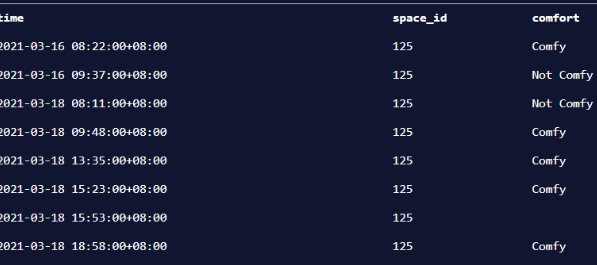

In [ ]:
 df['comfort'].ffill(axis=0, inplace=True)
 # Applying Forward Fill (another name for LOCF) on the comfort column

In [ ]:
#@title Data Cleaning 

#dropping 'Rk' and 'Notes' columns
premier_league = pd.DataFrame(df2022, columns=['Squad',	'MP',	'W',	'D',	'L',	'GF', 'GA',	'GD',	'Pts',	'Pts/MP',	'xG',	'xGA',	'xGD',	'xGD/90',	'Attendance', 'Top Team Scorer',	'Goalkeeper'])
premier_league.fillna(0)

premier_league['xGD'] = premier_league['xGD'].astype('int64')
premier_league['xG'] = premier_league['xG'].astype('int64')
premier_league['xGA'] = premier_league['xGA'].astype('int64')

premier_league 

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,Manchester City,38,28,5,5,94,33,61,89,2.34,77,31,46,1.22,53249,Erling Haaland - 36,Ederson
1,Arsenal,38,26,6,6,88,43,45,84,2.21,71,42,29,0.78,60191,"Martin Ødegaard, Martinelli - 15",Aaron Ramsdale
2,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67,50,17,0.45,73671,Marcus Rashford - 17,David de Gea
3,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,71,39,32,0.85,52127,Callum Wilson - 18,Nick Pope
4,Liverpool,38,19,10,9,75,47,28,67,1.76,72,50,21,0.57,53163,Mohamed Salah - 19,Alisson
5,Brighton,38,18,8,12,72,53,19,62,1.63,73,50,23,0.61,31477,Alexis Mac Allister - 10,Robert Sánchez
6,Aston Villa,38,18,7,13,51,46,5,61,1.61,50,52,-2,-0.06,39485,Ollie Watkins - 15,Emiliano Martínez
7,Tottenham,38,18,6,14,70,63,7,60,1.58,57,49,7,0.19,61585,Harry Kane - 30,Hugo Lloris
8,Brentford,38,15,14,9,58,46,12,59,1.55,55,48,7,0.18,17078,Ivan Toney - 20,David Raya
9,Fulham,38,15,7,16,55,53,2,52,1.37,46,63,-17,-0.46,23746,Aleksandar Mitrović - 14,Bernd Leno


In [ ]:
#@title Renaming the columns

# axis=1 refers to the columns, `axis=0` would refer to the rows
# In the dictionary the key refers to the original column name and the value refers to the new column name {'oldname1': 'newname1', 'oldname2': 'newname2'}
df = df.rename({'full url': 'url', 'http status code': 'status code'}, axis=1)
df.head() 


,url,status code,redirects to url,no. of redirection hops to ultimate destination,url is part of redirect loop,no. of internal follow inlinks (from distinct urls)
0,https://www.ysl.com/zh-sg/rive-droite/art-prog...,301,https://www.ysl.com/zh-sg,1,False,1
1,https://www.ysl.com/en-it/legal-notices/privac...,301,https://www.ysl.com/en-it/legal-notices/name/p...,1,False,3
2,https://www.ysl.com/en-sg/legal-notices/cookie...,301,https://www.ysl.com/en-sg/legal-notices/name/c...,1,False,2
3,https://ysl.com/en-lt/StoreLocator,301,https://www.ysl.com/en-lt/StoreLocator,1,False,1
4,https://www.ysl.com/en-my/rive-droite/saint-la...,301,https://www.ysl.com/en-my,1,False,0


In [ ]:
#@title Look at the number of unique values in each column  
#.nunique() counts the number of unique values in each column 
premier_league.nunique() 

Squad              20
MP                  1
W                  11
D                   8
L                  14
GF                 17
GA                 14
GD                 18
Pts                20
Pts/MP             20
xG                 16
xGA                14
xGD                18
xGD/90             20
Attendance         20
Top Team Scorer    20
Goalkeeper         20
dtype: int64

In [ ]:
#@title Show specific data types in dataframe
premier_league.select_dtypes(include=['number'])


,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,7,5,2,0,15,5,10,17,2.43,13.7,6.4,7.3,1.04,35657
1,7,5,2,0,11,3,8,17,2.43,9.1,6.3,2.8,0.40,18465
2,7,5,1,1,15,7,8,16,2.29,9.4,7.5,1.9,0.27,20830
3,7,4,2,1,13,5,8,14,2.00,8.8,8.9,-0.1,-0.02,43625
4,7,4,2,1,13,8,5,14,2.00,12.2,5.8,6.4,0.91,72169
5,7,4,1,2,8,7,1,13,1.86,14.8,5.4,9.4,1.34,60954
6,7,4,0,3,13,11,2,12,1.71,12.2,6.5,5.7,0.81,70365
7,7,2,4,1,9,5,4,10,1.43,8.5,8.5,0.0,0.01,37634
8,7,3,1,3,6,7,-1,10,1.43,9.0,8.4,0.5,0.08,16813
9,7,2,3,2,7,6,1,9,1.29,9.9,7.3,2.6,0.37,33878


#Univariate Analysis

In [ ]:

#mean = flight['coach_price'].mean()
print(mean)
median = flight['coach_price'].median()
print(median)


# Data Distribution with a Boxplot 

A box plot is a method for demonstrating the locality, spread and skewness groups of numerical data through their quartile.

The box plot is suitable for comparing range and distribution for groups of numerical data.

**Advantages**: organizes large amounts of data, and visualizes outlier values.

**Disadvantages**:  not relevant for detailed analysis of the data as it deals with a summary of the data distribution.

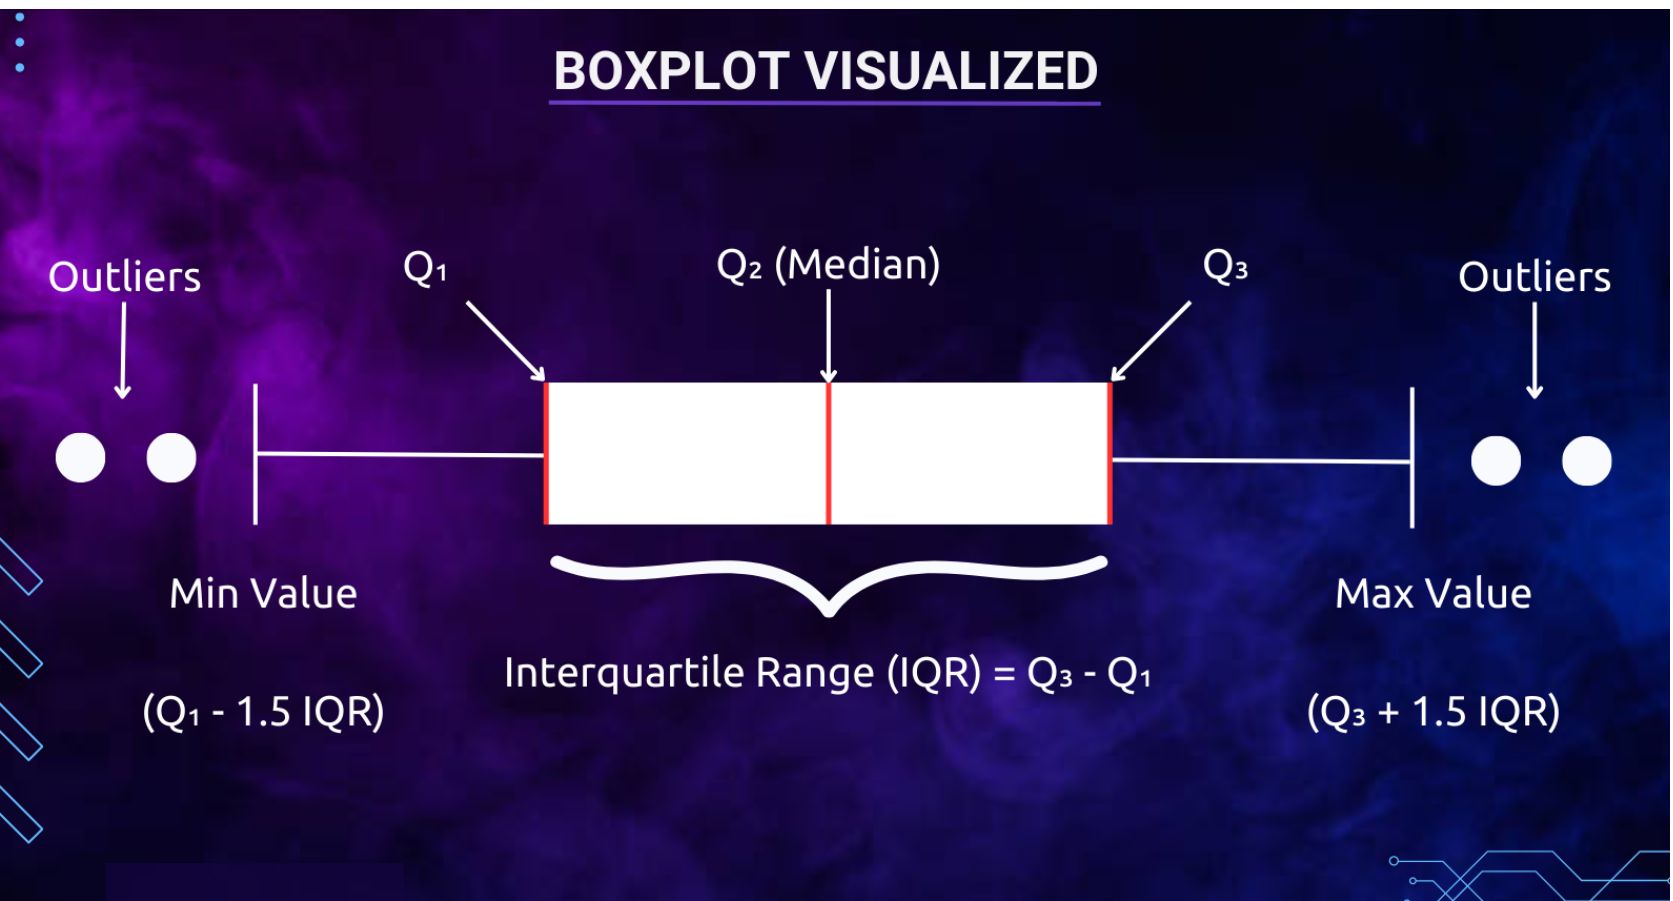

In [ ]:
# Create a boxplot of Clicks and Impressions columns using Plotly Express
fig = px.box(premier_league,
             y=['Attendance'],
             orientation='v',
             template='plotly_dark',
             width=1024,
             height=600)

# Add labels and title
fig.update_layout(xaxis_title='Active goals', title='Boxplot of Attendance at the Stadia')

# Display the plot
fig.show()



For attendance, the median value sits around 35, which can be translated as 
##**“50% of the observations have slightly more than 35,000 people going to the stadium this season**


The rest of the data spreading around the graph are just  **outliers**


Based on the Attendance distribution, we can divide each teams into 3 tiers:
- High Attendance
- Average Attendance
- Low Attendnace 

In [ ]:
selected_columns = ['Squad', 'Attendance']

# Create a new DataFrame with selected columns
filtered = premier_league[selected_columns]

# Create the 'Degree' column with a default value of False
filtered['Degree'] = False

# Set 'High' for rows where 'Attendance' is between 53000 and 73000
filtered.loc[(filtered['Attendance'] >= 53000) & (filtered['Attendance'] <= 74000), 'Degree'] = 'High'
filtered.loc[(filtered['Attendance'] >= 29000) & (filtered['Attendance'] <= 53000), 'Degree'] = 'Average'
filtered.loc[(filtered['Attendance'] < 29000), 'Degree'] = 'Low'

# Print the updated DataFrame
desired_order = ['High','Average','Low']

# Convert the 'Variable' column to Categorical data type with desired order
filtered['Degree'] = pd.Categorical(filtered['Degree'], categories=desired_order, ordered=True)

filtered = filtered.sort_values('Degree')
filtered

<ipython-input-37-36eb205673cd>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-36eb205673cd>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Squad,Attendance,Degree
0,Manchester City,53249,High
1,Arsenal,60191,High
2,Manchester Utd,73671,High
4,Liverpool,53163,High
7,Tottenham,61585,High
13,West Ham,62462,High
17,Leicester City,30193,Average
16,Everton,37180,Average
15,Nott'ham Forest,29188,Average
12,Wolves,31482,Average


In [ ]:
ranking_pages = filtered.pivot_table(index='Degree', columns='Squad', values = "Attendance", fill_value=0)

# Reorder the columns based on the desired order

heatmap = px.imshow(ranking_pages, text_auto=True)
heatmap.update_layout(
     title='Attendance by Squad',
     template='plotly_dark', 
     xaxis_title='',
     yaxis_title='Attendance',
     width=1200, 
     height=700,
     legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
        ))
heatmap.show()

In [ ]:
median_score = premier_league['GF'].median()
median_score

51.0

In [ ]:
#@title GF for the top team vs GF for bottom teams
goals_top = premier_league.Squad[premier_league.GF >= 51]
goals_bottom = premier_league.Squad[premier_league.GF <= 51]
goals_top

0     Manchester City
1             Arsenal
2      Manchester Utd
3       Newcastle Utd
4           Liverpool
5            Brighton
6         Aston Villa
7           Tottenham
8           Brentford
9              Fulham
17     Leicester City
Name: Squad, dtype: object

In [ ]:
goals_bottom

6         Aston Villa
10     Crystal Palace
11            Chelsea
12             Wolves
13           West Ham
14        Bournemouth
15    Nott'ham Forest
16            Everton
17     Leicester City
18       Leeds United
19        Southampton
Name: Squad, dtype: object

#IQR calculation to trim away Outliers 

Inter-Quartile Range (IQR): The difference between the 75th and 25th percentile values.

- For highly skewed data or data with extreme outliers, we might prefer to use **IQR**

- For data that is more normally distributed, the **variance and standard deviation** are frequently reported.

# Central Tendency for Quantitative Data
For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable.

- Mean: The average value of the variable, calculated as the sum of all values divided by the number of values.
- Median: The middle value of the variable when sorted.
- Mode: The most frequent value of the variable.
- Trimmed mean: The mean excluding x percent of the lowest and highest data points.

In [ ]:
# Mean
premier_league.Attendance.mean()
 
# Median
premier_league.Attendance.median()
 
# Mode
premier_league.Attendance.mode()
 
# Trimmed mean
from scipy.stats import trim_mean
trim_mean(premier_league.Attendance, proportiontocut=0.1)  # trim extreme 10%

14498.375

#Spread for Quantitative Data
The spread of a quantitative variable describes the amount of variability.

 This is important because it provides context for measures of central tendency. 
 
 For example, if there is a lot of variability in New York City rent prices, we can be less certain that the mean or median price is representative of what the typical rent is.

In [ ]:
# range
premier_league.Attendance.max() - premier_league.Attendance.min()


35828

In [ ]:
# Interquartile range
premier_league.Attendance.quantile(0.75) - premier_league.Attendance.quantile(0.25)


13099.0

In [ ]:

# Variance
premier_league.Attendance.var()
 
# Standard deviation
premier_league.Attendance.std()
 
# Mean absolute deviation
premier_league.Attendance.mad()

In [ ]:
#@title Count Values
query_counts = brand.Query.value_counts()
query_counts

AttributeError: ignored

In [ ]:
#@title measure the proportion of values
query_props = brand.Query.value_counts(normalize=True)
query_props

#QUESTIONS
Conditional Selection

In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.




In [ ]:
#@title **What team have earned more points so far?**
premier_league[premier_league.Pts == premier_league.Pts.max()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,Manchester City,38,28,5,5,94,33,61,89,2.34,77,31,46,1.22,53249,Erling Haaland - 36,Ederson


In [ ]:
#@title **What team have earned less points so far?**

premier_league[premier_league.Pts == premier_league.Pts.min()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
19,Southampton,38,6,7,25,36,73,-37,25,0.66,37,60,-23,-0.61,30440,James Ward-Prowse - 9,Gavin Bazunu


In [ ]:
#@title What teams are lingering at half of the chart?
premier_league[premier_league.Pts == premier_league.Pts.median()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper


In [ ]:
#@title **What team has recorded the highest attendance so far?**

Top_Attendance = premier_league[premier_league.Attendance == premier_league.Attendance.max()]
Top_Attendance

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
2,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67,50,17,0.45,73671,Marcus Rashford - 17,David de Gea


In [ ]:
#@title **What team has recorded the smallest attendance so far?**
Least_Attendance = premier_league[premier_league.Attendance == premier_league.Attendance.min()]
Least_Attendance

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
14,Bournemouth,38,11,6,21,37,71,-34,39,1.03,38,63,-25,-0.67,10362,Philip Billing - 7,Neto


In [ ]:
#@title **What team have collected more defeats so far?**

premier_league[premier_league.L == premier_league.L.max()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
19,Southampton,38,6,7,25,36,73,-37,25,0.66,37,60,-23,-0.61,30440,James Ward-Prowse - 9,Gavin Bazunu


In [ ]:
#@title **What team has scored more so far?**
premier_league[premier_league.GF == premier_league.GF.max()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,Manchester City,38,28,5,5,94,33,61,89,2.34,77,31,46,1.22,53249,Erling Haaland - 36,Ederson


In [ ]:
#@title What team has suffered more goals 
premier_league[premier_league.GA == premier_league.GA.max()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
18,Leeds United,38,7,10,21,48,78,-30,31,0.82,47,67,-19,-0.52,34626,Rodrigo - 13,Illan Meslier


In [ ]:
#@title What team has had the highest Goal Expectancy so far?
premier_league[premier_league.xG == premier_league.xG.max()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
5,Roma,7,4,1,2,8,7,1,13,1.86,14.8,5.4,9.4,1.34,D W L W L,60954,Paulo Dybala - 3,Rui Patrício


In [ ]:
#@title What team has the least Goal Expectancy so far?
premier_league[premier_league.xG == premier_league.xG.min()]

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
11,Spezia,7,2,2,3,7,11,-4,8,1.14,4.7,12.4,-7.7,-1.11,D L D L W,8104,M'Bala Nzola - 3,Bartłomiej Drągowski


In [ ]:
#@title GroupBy() function
#Which player scored the highest (PTS) in the Los Angeles Lakers?

Stadiums = premier_league.groupby('Attendance').get_group('Squad')
Stadiums[premier_league.Attendance == premier_league.Attendance.max()]

KeyError: ignored

In [ ]:
#@title Describe Categorical and Numerical Variables
#df.𝗱𝗲𝘀𝗰𝗿𝗶𝗯𝗲() can also provide a quick summary of non-numeric columns. You can do this by specifying (include='all') 
#As a result, it will return the number of unique elements, the top element with its frequency
premier_league.describe(include='all')

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
count,20,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20,20.000000,20,20
unique,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,20,20
top,Napoli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W W W W W,NaN,Victor Osimhen - 9,Alex Meret
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1
mean,NaN,15.0,5.700000,3.600000,5.700000,19.350000,19.350000,0.000000,20.700000,1.380500,18.945000,18.95000,0.015000,0.000500,NaN,23044.800000,NaN,NaN
std,NaN,0.0,3.435113,1.698296,3.010508,7.855772,5.958408,12.333096,9.603179,0.639831,5.118437,4.55383,9.072589,0.605044,NaN,15713.573186,NaN,NaN
min,NaN,15.0,0.000000,0.000000,0.000000,6.000000,7.000000,-21.000000,5.000000,0.330000,11.200000,10.60000,-10.700000,-0.720000,NaN,6717.000000,NaN,NaN
25%,NaN,15.0,3.750000,3.000000,3.750000,14.000000,15.000000,-7.000000,15.750000,1.052500,16.100000,16.27500,-7.975000,-0.530000,NaN,13234.250000,NaN,NaN
50%,NaN,15.0,5.000000,3.500000,6.000000,18.000000,19.500000,-2.500000,19.000000,1.270000,17.600000,18.50000,-1.000000,-0.070000,NaN,16542.500000,NaN,NaN
75%,NaN,15.0,8.250000,4.250000,7.250000,24.000000,24.250000,8.250000,27.750000,1.850000,21.575000,21.15000,5.075000,0.340000,NaN,29162.000000,NaN,NaN


In [ ]:
#@title Group Descriptive Stats for Attendance

premier_league.groupby('Attendance').Attendance.describe()

,count,mean,std,min,25%,50%,75%,max
Attendance,,,,,,,,
7413,1.0,7413.0,NaN,7413.0,7413.0,7413.0,7413.0,7413.0
8104,1.0,8104.0,NaN,8104.0,8104.0,8104.0,8104.0,8104.0
11223,1.0,11223.0,NaN,11223.0,11223.0,11223.0,11223.0,11223.0
11386,1.0,11386.0,NaN,11386.0,11386.0,11386.0,11386.0,11386.0
11989,1.0,11989.0,NaN,11989.0,11989.0,11989.0,11989.0,11989.0
16583,1.0,16583.0,NaN,16583.0,16583.0,16583.0,16583.0,16583.0
16813,1.0,16813.0,NaN,16813.0,16813.0,16813.0,16813.0,16813.0
18021,1.0,18021.0,NaN,18021.0,18021.0,18021.0,18021.0,18021.0
18465,1.0,18465.0,NaN,18465.0,18465.0,18465.0,18465.0,18465.0


#Bar chart 
Very good for categorical variables 

premier_league has only a limited proportion of categorical variables which are not wrth plotting

**the below is an example of bar chart though**

In [ ]:
#@title plot bar charts wiht Seaborn
import seaborn as sns
sns.countplot(premier_league["Goalkeeper"],#ordering nominal variables ('draw', 'outoftime')
              order=premier_league["Goalkeeper"].value_counts(ascending=True).index)
#plt.xticks(rotation=30) - make sure to have matplotlib imported
plt.show()
plt.clf()

#ordering ordinal data ('first, second)
#sns.countplot(df["Grade Level"], order=["First Year", "Second Year", "Third Year", "Fourth Year"])

ValueError: ignored

#Histograms
We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.



<Axes: xlabel='Attendance', ylabel='Count'>

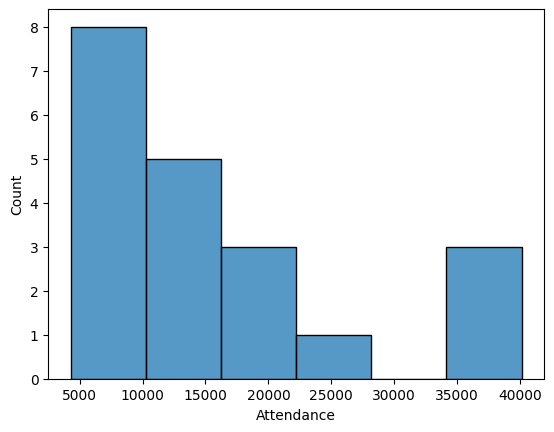

In [ ]:
sns.histplot(x = 'Attendance', data = premier_league)

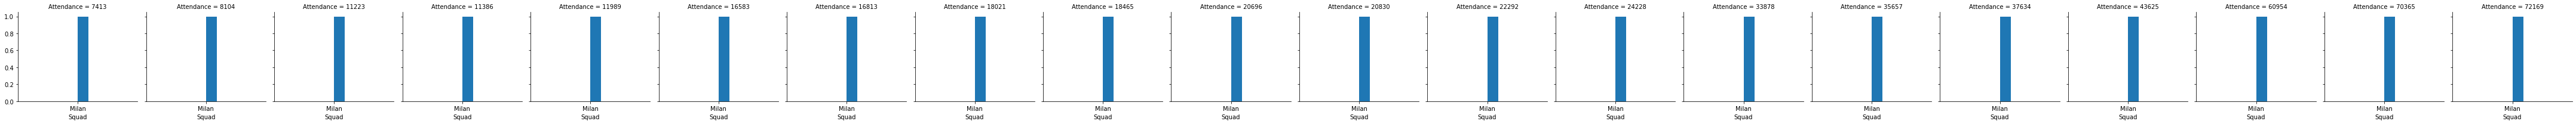

In [ ]:
#@title Seaborn data visualization
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(Teams_Attendance, col="Attendance")
g.map(plt.hist, "Squad");

#Bivariate Analysis

#Heat map


---

The brighter the spots on the map, the higher the correlations

In [ ]:
#@title Compute the correlation matrix
corr = premier_league.corr()
corr

,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
MP,1.000000,-0.034381,0.232988,0.059131,-0.045206,-0.004447,-0.023641,0.012464,-0.069262,0.210093,0.171938,0.015957,0.017312,0.118428
W,-0.034381,1.000000,-0.491131,-0.820305,0.857069,-0.737516,0.885143,0.982475,0.981990,0.786076,-0.742145,0.823086,0.827388,0.516377
D,0.232988,-0.491131,1.000000,-0.072328,-0.266061,-0.089748,-0.105343,-0.320156,-0.338134,-0.351926,0.324574,-0.364716,-0.363948,-0.356851
L,0.059131,-0.820305,-0.072328,1.000000,-0.810666,0.905585,-0.947801,-0.907614,-0.909389,-0.625864,0.661775,-0.694082,-0.699294,-0.329555
GF,-0.045206,0.857069,-0.266061,-0.810666,1.000000,-0.631735,0.911128,0.875189,0.879660,0.724984,-0.582686,0.703981,0.707709,0.534445
GA,-0.004447,-0.737516,-0.089748,0.905585,-0.631735,1.000000,-0.895063,-0.821303,-0.818299,-0.552138,0.704965,-0.678728,-0.684923,-0.245506
GD,-0.023641,0.885143,-0.105343,-0.947801,0.911128,-0.895063,1.000000,0.940111,0.941086,0.710602,-0.709992,0.765821,0.771259,0.437972
Pts,0.012464,0.982475,-0.320156,-0.907614,0.875189,-0.821303,0.940111,1.000000,0.995626,0.779605,-0.737680,0.817119,0.821962,0.485235
Pts/MP,-0.069262,0.981990,-0.338134,-0.909389,0.879660,-0.818299,0.941086,0.995626,1.000000,0.753546,-0.742813,0.806233,0.811701,0.468716
xG,0.210093,0.786076,-0.351926,-0.625864,0.724984,-0.552138,0.710602,0.779605,0.753546,1.000000,-0.717226,0.923682,0.922536,0.745351


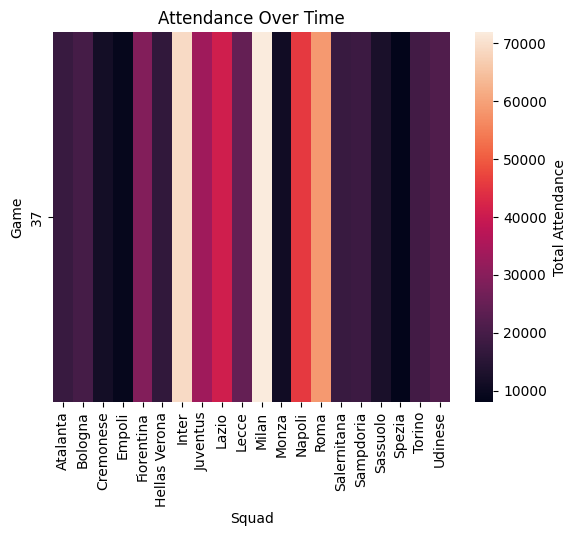

In [ ]:
#@title Make the heat map
#sns.heatmap(corr)

# re-format the data for the heat-map
attendance_by_game = premier_league.reset_index().pivot(index="MP", columns="Squad", values="Attendance")
 
# create heatmap
sns.heatmap(attendance_by_game, cbar_kws={"label": "Total Attendance"})
plt.title("Attendance Over Time")
plt.xlabel("Squad")
plt.ylabel("Game")
plt.show()

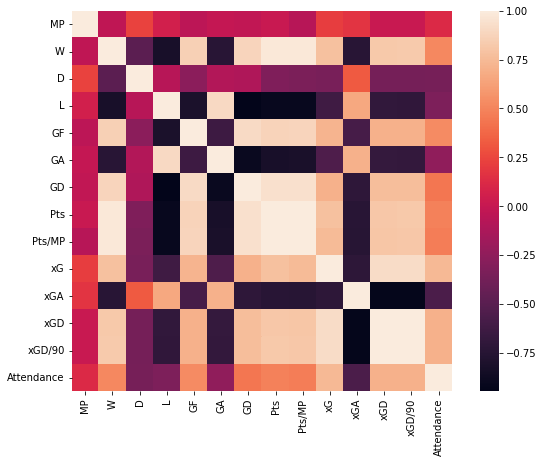

In [ ]:
#@title Adjust figure size of heat map
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, square=True)

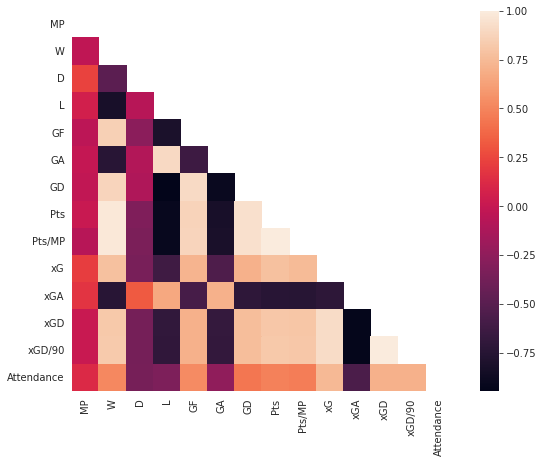

In [ ]:
#@title Trigger the focus on the Heatmap findings with a **Diagonal correlation matrix**
# it's a mirror image of the other part, so it will help us focus more on the data by looking at one facet

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [ ]:
ranking_pages = brand.head(25).pivot_table(index='Position', columns='month', values = "Clicks", aggfunc='count', fill_value=0)
ranking_pages.rename(columns={
    1: 'January',
    2: 'February',
    3: 'March',
    4:'April'
}, inplace=True)
heatmap = px.imshow(ranking_pages, text_auto=True)
heatmap.update_layout(
     title='Change of Positions by Page Clicks over time',
     template='plotly_dark', 
     xaxis_title='',
     yaxis_title='Rankings',
     width=1024, 
     height=600,
     legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
        ))
heatmap.show()



##xG and GD seem to share a correlation relationship to some extent. Let's get deeper

Text(0.5, 1.0, 'xG vs. GD')

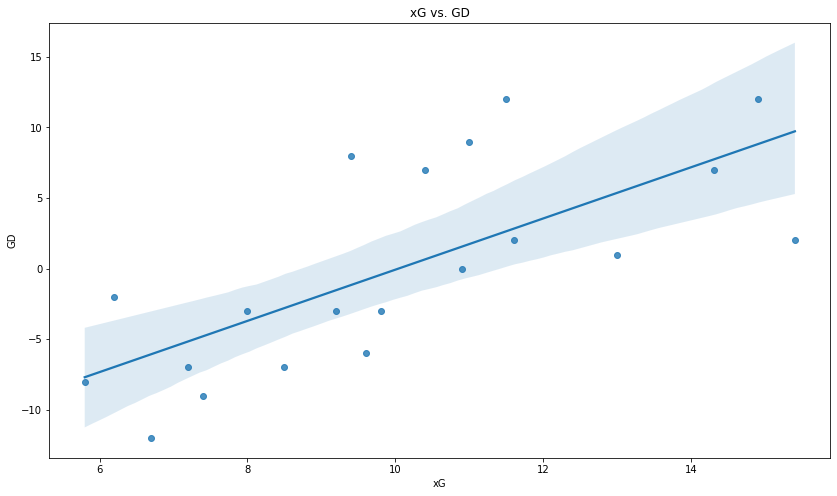

In [ ]:
#@title Scaterplot to assees Correlation between 'xG vs. GD'
import seaborn as sns
plt.figure(figsize=(14,8))
sns.regplot(x=premier_league["xG"], y=premier_league["GD"])
plt.title('xG vs. GD')

##Despite weak, a positive correlation seems to exist between goal expectancy and goals scored. 

#Scatter Plot

In [ ]:
premier_league

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,Napoli,15,13,2,0,37,12,25,41,2.73,29.3,12.3,17.0,1.13,W W W W W,29741,Victor Osimhen - 9,Alex Meret
1,Milan,15,10,3,2,29,15,14,33,2.20,23.9,14.5,9.4,0.63,W L W D W,54643,Rafael Leão - 6,Ciprian Tătărușanu
2,Juventus,15,9,4,2,24,7,17,31,2.07,20.3,16.5,3.9,0.26,W W W W W,27871,Dušan Vlahović - 6,Wojciech Szczęsny
3,Lazio,15,9,3,3,26,11,15,30,2.00,18.4,17.2,1.3,0.08,W L W W L,37563,Ciro Immobile - 6,Ivan Provedel
4,Inter,15,10,0,5,34,22,12,30,2.00,27.6,14.7,12.9,0.86,W W L W W,62178,Lautaro Martínez - 7,Samir Handanović
5,Atalanta,15,8,3,4,22,15,7,27,1.80,24.2,15.6,8.6,0.58,L W L L L,13803,Ademola Lookman - 7,Juan Musso
6,Roma,15,8,3,4,18,14,4,27,1.80,26.8,10.6,16.2,1.08,L W L D D,44073,Paulo Dybala - 5,Rui Patrício
7,Udinese,15,6,6,3,24,17,7,24,1.60,19.2,18.1,1.1,0.07,L D D D L,18386,Beto - 6,Marco Silvestri
8,Torino,15,6,3,6,16,17,-1,21,1.40,15.8,19.3,-3.4,-0.23,W W L W D,16519,Nikola Vlašić - 4,Vanja Milinković-Savić
9,Fiorentina,15,5,4,6,18,20,-2,19,1.27,20.8,17.0,3.9,0.26,L W W W L,28969,"Giacomo Bonaventura, Luka Jović - 3",Pietro Terracciano


In [ ]:
#@title Select columns if they have numerical data types
premier_league.select_dtypes(include=['number'])


,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,37,27,6,4,75,28,47,87,2.35,62.7,31.1,31.6,0.85,45682
1,37,21,8,8,58,30,28,71,1.92,49.6,41.0,8.6,0.23,40763
2,37,22,3,12,70,42,28,69,1.86,67.1,35.2,31.8,0.86,68881
3,37,19,10,8,61,42,19,67,1.81,56.5,40.2,16.2,0.44,71868
4,37,18,7,12,61,46,15,61,1.65,53.6,40.2,13.3,0.36,17660
5,37,17,9,11,48,37,11,60,1.62,55.2,31.1,24.1,0.65,58449
6,37,21,6,10,55,33,22,59,1.59,54.0,40.8,13.2,0.36,33463
7,37,14,11,12,42,40,2,53,1.43,40.6,39.0,1.6,0.04,19183
8,37,14,11,12,50,42,8,53,1.43,53.5,42.3,11.2,0.30,29031
9,37,14,10,13,46,47,-1,52,1.41,44.7,47.3,-2.6,-0.07,10860


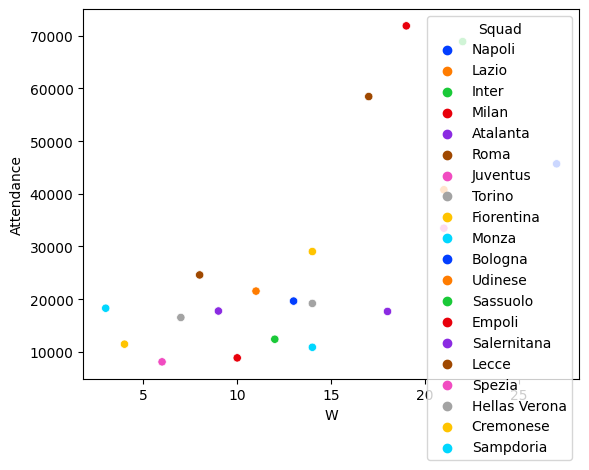

<Figure size 5000x4500 with 0 Axes>

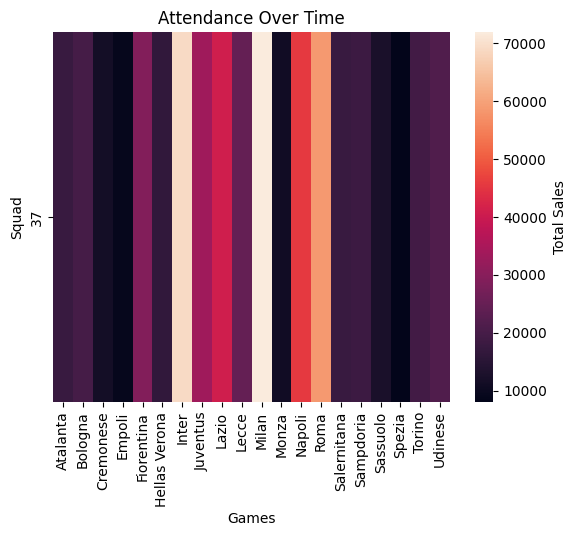

In [ ]:
#@title Plot Attendance on Win Games with Pandas
 
sns.scatterplot(x = 'W', y = 'Attendance', hue = 'Squad', palette = 'colorblind', data = premier_league)
plt.figure(figsize=(50, 45)) 
plt.show()

 


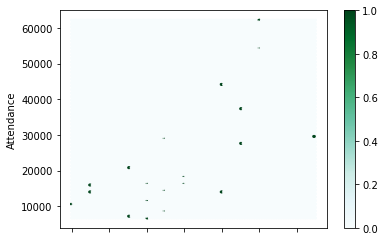

In [ ]:
#@title Plot a Scatterplot with Hexbin to improve visualization (good when having plenty of data)
premier_league.plot(kind='hexbin',
             x='W',
             y='Attendance')

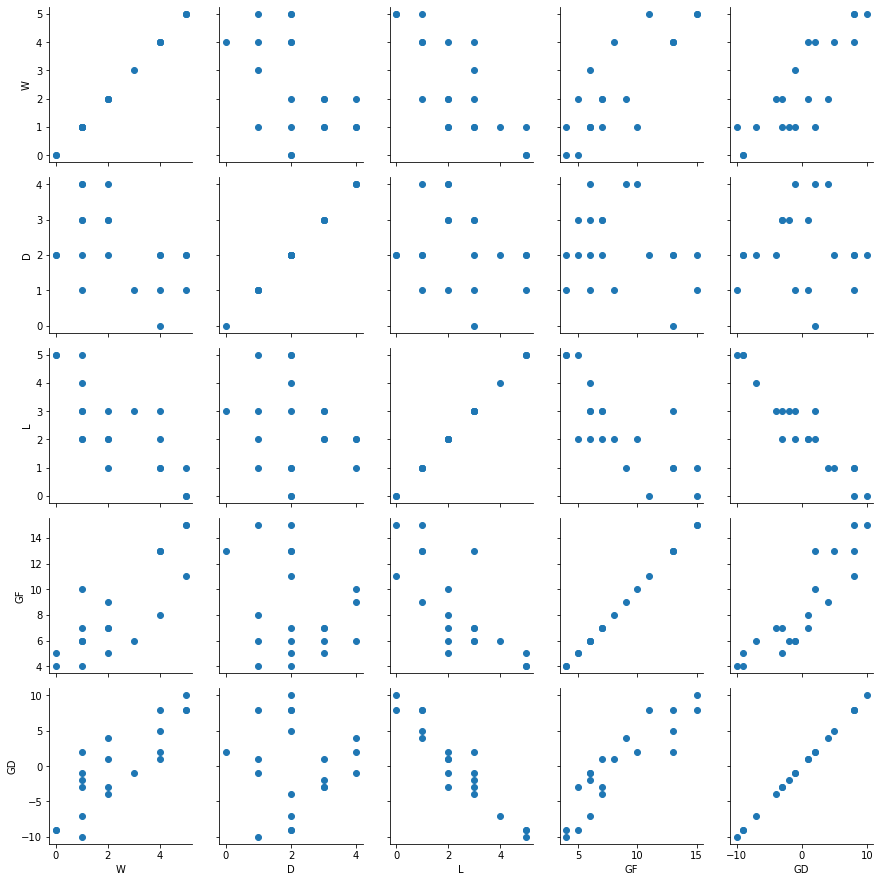

In [ ]:
#@title Make a scatter plot for 5 specific columns (by column names)
import seaborn as sns

selections = ['W','D','L','GF','GD']
df5 = premier_league[selections]
g = sns.PairGrid(df5)
g.map(plt.scatter)


As we can see from the scatter plot map, we could be able to draw a diagonal line. We can start to infer that every single variable self compares meaning that data might be mirror image of one another and they establish a positive correlation 

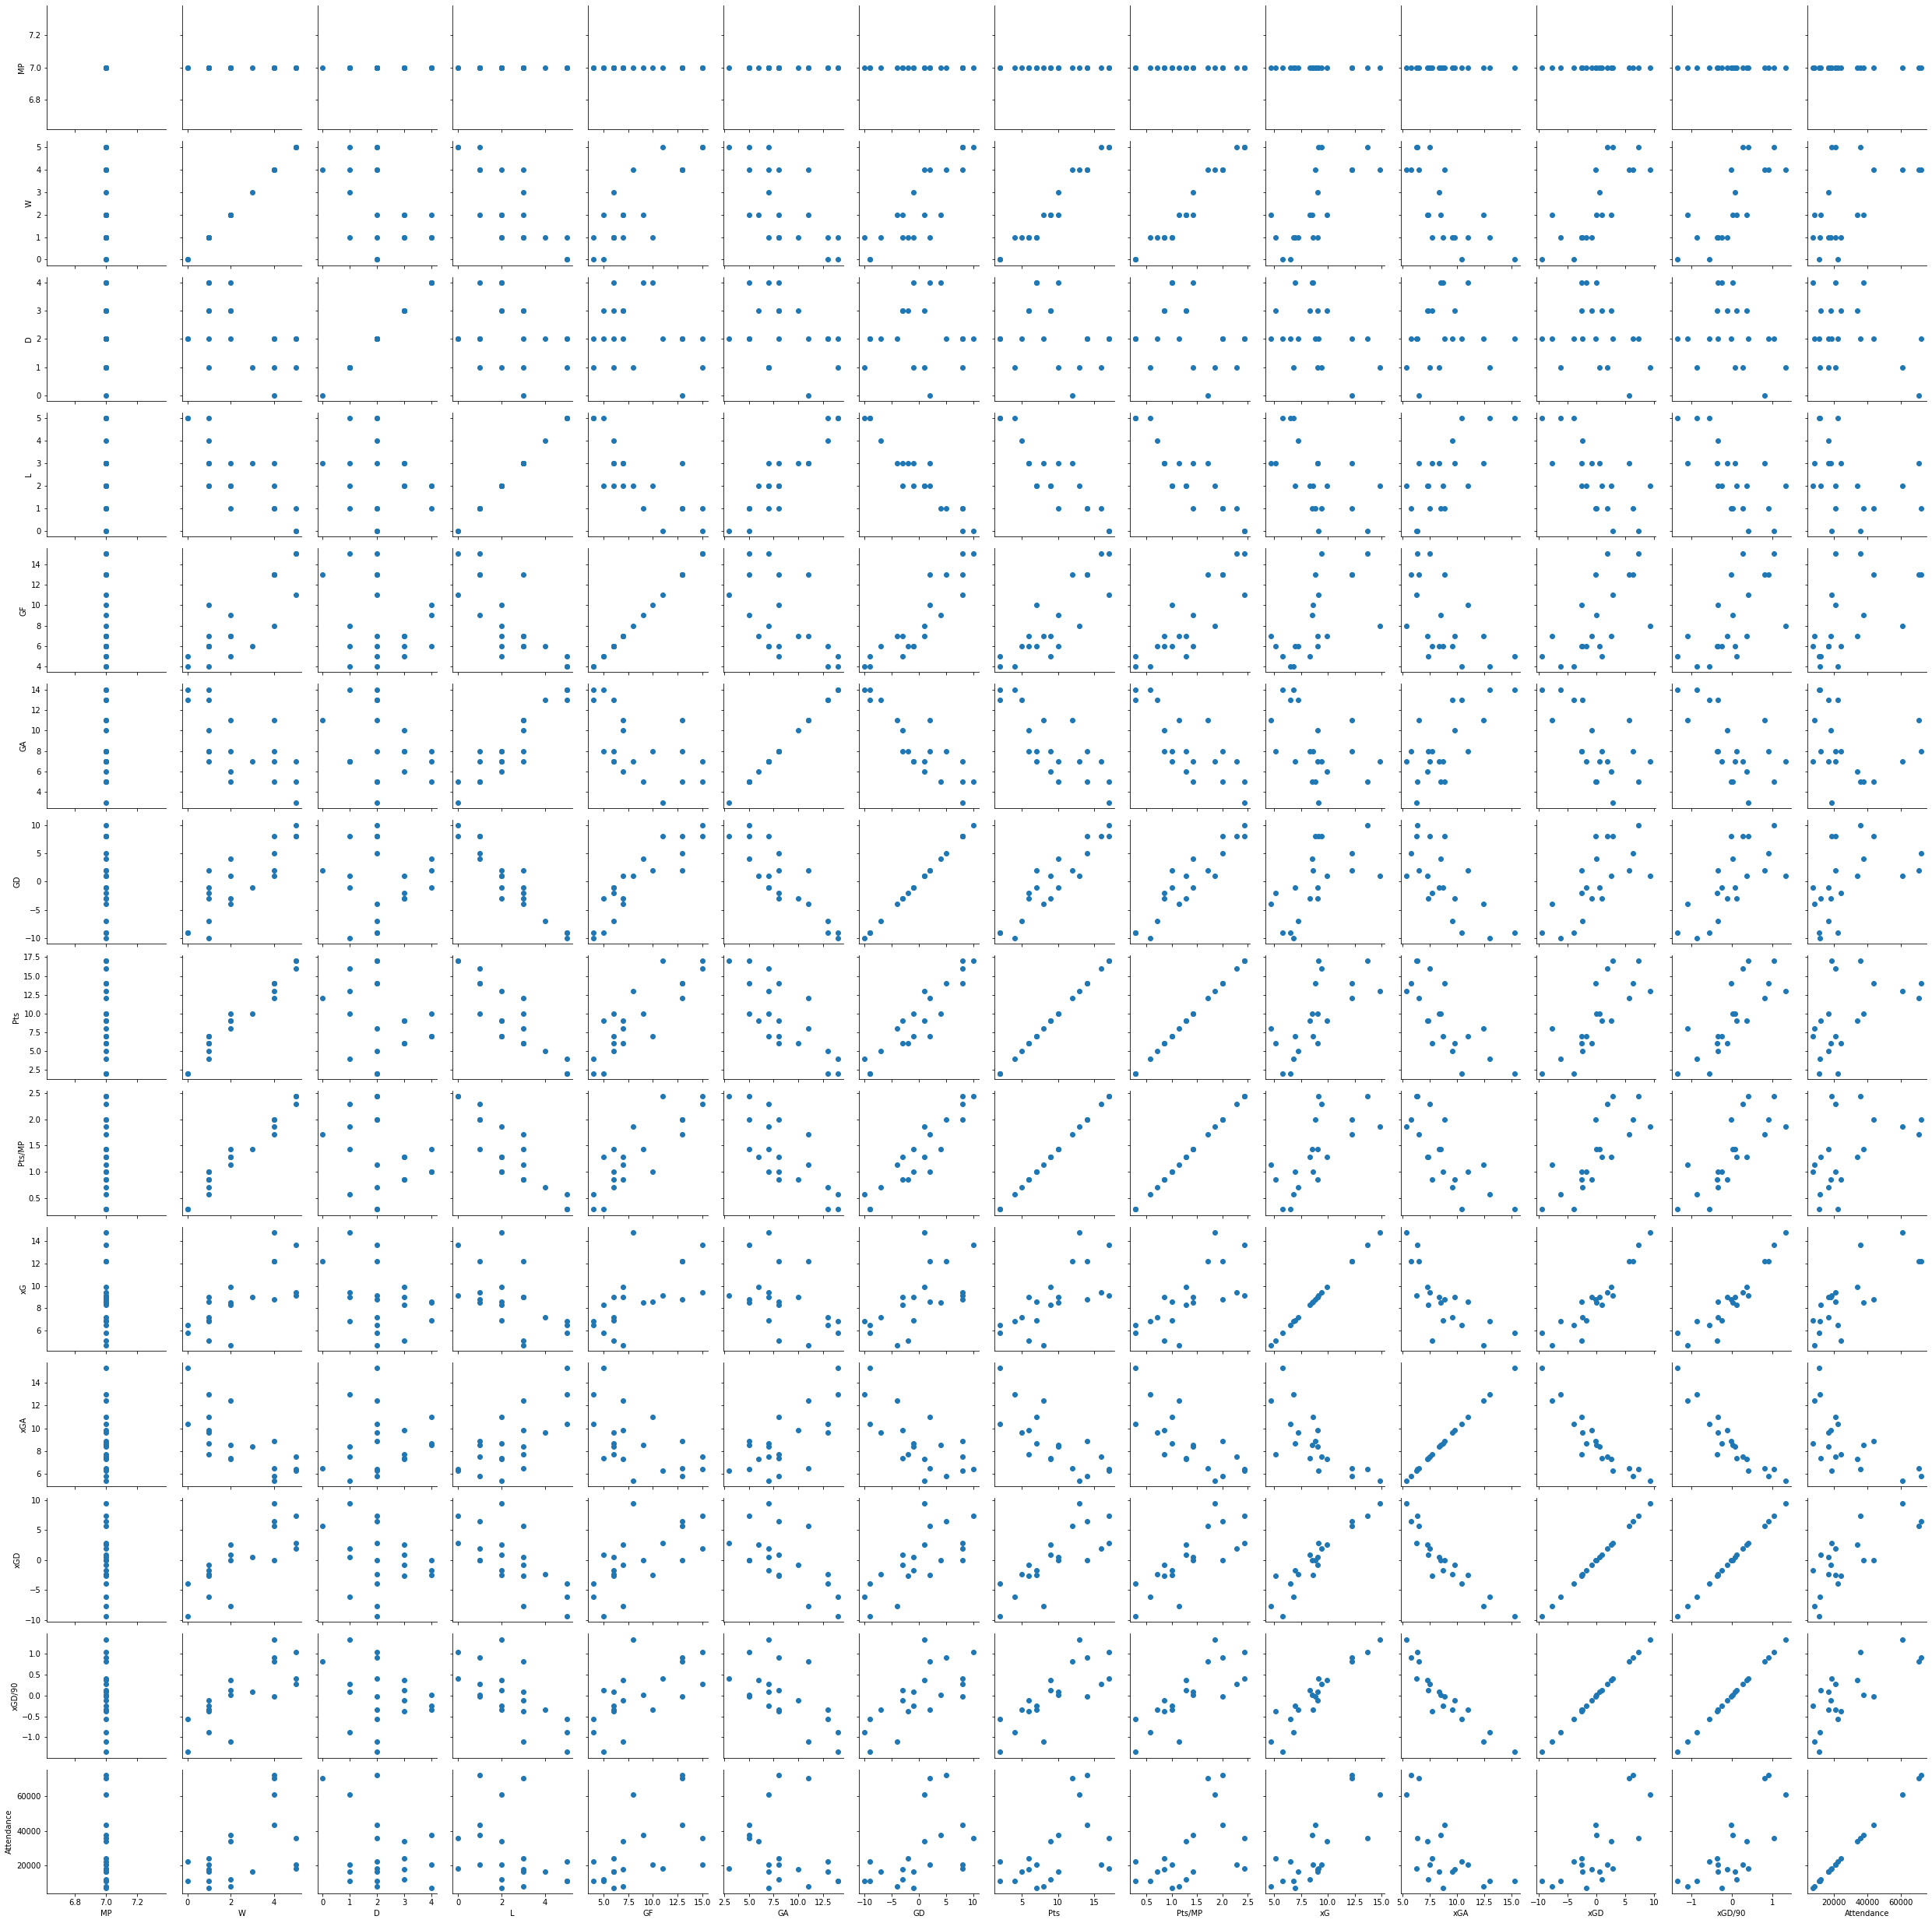

In [ ]:
#@title Make scatter plot for all the data 
import seaborn as sns

g = sns.PairGrid(premier_league)
g.map(plt.scatter);

#Conclusions
As we hypothesized, data appears to be overall positive correlated one another. 
To narrow down, we can positive correlations are widespread even when variables have a weaker correlation prompt.

However, the scatter plot suggests negative correlations unsurprisingly persist between opposite factors (e.g xGA and GD).

Overall, results suggest a positive correlation is what ties up football stats from the current state of the Italian Serie A


---

#Reminder
/ = positive correlation
\ = negative correlation
